In [2]:
import numpy as np
import pygimli as pg
import pygimli.meshtools as mt
import pygimli.physics.traveltime as tt

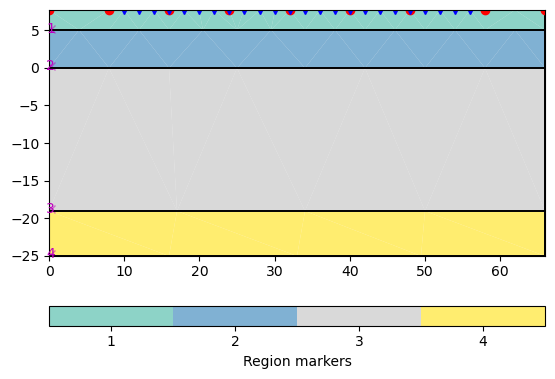

In [3]:
left = 0; right = 66; depth = 25;
geometry= mt.createWorld(start = [left, 7.7], end = [right, -depth], layers=[5, 0, -19]);

nsensors = 24;
sources = np.ones((9,2))*7.7;
sources[:,0] = [0, 8, 16, 24, 32, 40, 48, 58, 66];
geophones = np.ones((nsensors,2))*7.7;
geophones[:,0] = np.linspace(10, 56, nsensors)
#
for pos in sources:
    geometry.createNode(pos)
for posGeo in geophones:
    geometry.createNode(posGeo)
#
ax, _ = pg.show(geometry)
ax.plot(sources[:,0],sources[:,1],'ro')
ax.plot(geophones[:,0],geophones[:,1],'bv')

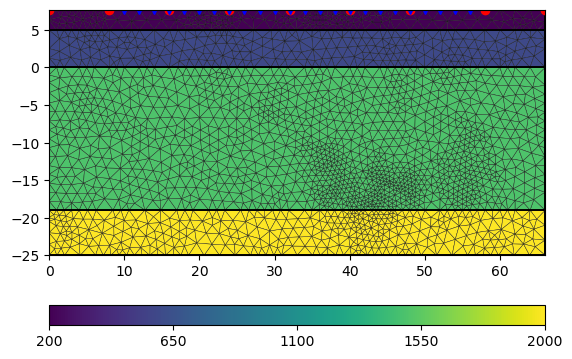

In [7]:

meshVel = mt.createMesh(geometry, quality=34.3, area=1.5, smooth=True);
# pg.show(meshVel, markers=True)
velMap = [[1, 200], [2, 600], [3, 1500], [4, 2000]];
# vel = pg.solver.parseMapToCellArray(velMap, meshVel)
vel = meshVel.populate("vel", velMap)
meshVel.setCellMarkers(pg.Vector(meshVel.cellCount()))
ax, cb = pg.show(meshVel, vel, showMesh=True)
ax.plot(sources[:,0],sources[:,1],'ro')
ax.plot(geophones[:,0],geophones[:,1],'bv')

In [28]:
# meshVel["marker"] = 0

Data: Sensors: 28 data: 211, nonzero entries: ['g', 's', 't', 'valid']


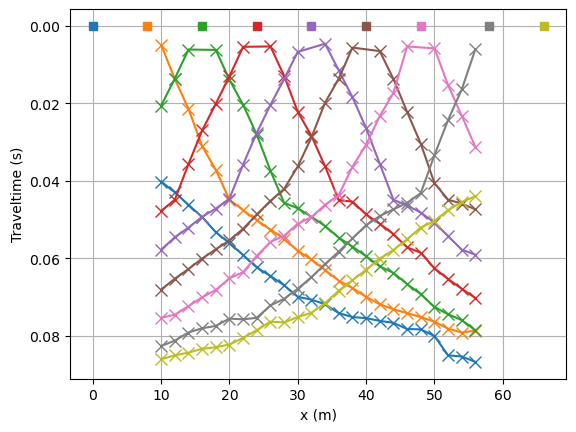

In [10]:
data = tt.load("picking_NS_20240607.sgt")
print(data)
tt.show(data)

In [11]:
data.sensor(0)

RVector3: (66.0, 7.7, 0.0)

05/03/24 - 14:34:40 - pyGIMLi - INFO - 10 data of 211 not shown
05/03/24 - 14:34:40 - pyGIMLi - INFO - [89, 108, 112, 127, 131, 135, 146, 150, 154, 158]


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x218b24bc4c0>)

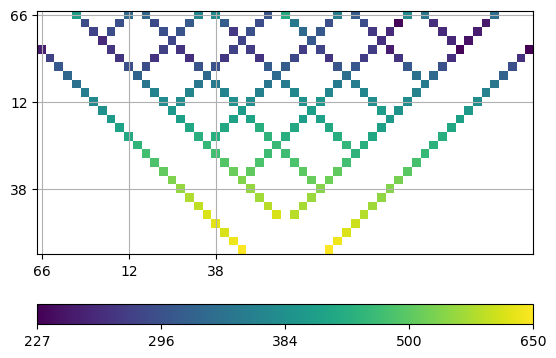

In [12]:
tt.showVA(data, pseudosection=True)

05/03/24 - 14:34:42 - pyGIMLi - INFO - Found 1 regions.
05/03/24 - 14:34:42 - pyGIMLi - INFO - Creating forward mesh from region infos.
05/03/24 - 14:34:42 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.
05/03/24 - 14:34:42 - pyGIMLi - INFO - Create gradient starting model. 500: 5000
05/03/24 - 14:34:42 - pyGIMLi - INFO - Created startmodel from forward operator: 3713, min/max=0.000200/0.002000
05/03/24 - 14:34:42 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.traveltime.modelling.TravelTimeDijkstraModelling object at 0x00000218B2A1A130>
Data transformation: <pgcore._pygimli_.RTrans object at 0x00000218B293E360>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000218AFE3CEE0>
min/max (data): 0.0046/0.09
min/max (error): 1.15%/21.74%
min/max (start model): 2.0e-04/0.002
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  908.50
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   57.23 (dPhi = 93.65%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    2.94 (dPhi = 94.42%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    1.75 (dPhi = 36.65%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    1

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x218e90fa700>)

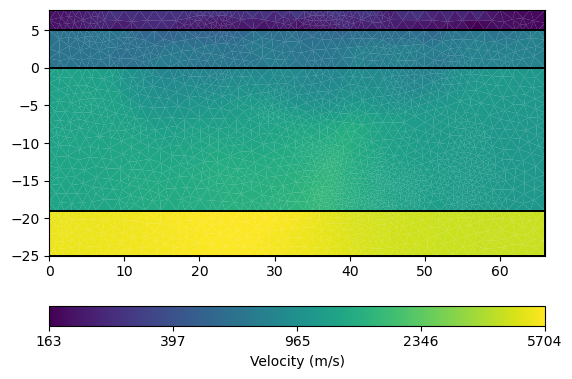

In [13]:
data["err"] = 0.001
mgr = tt.Manager(data)
mgr.setMesh(meshVel)
mgr.inv.setRegularization('*', background=False)
mgr.invert(verbose=True)
mgr.showResult()

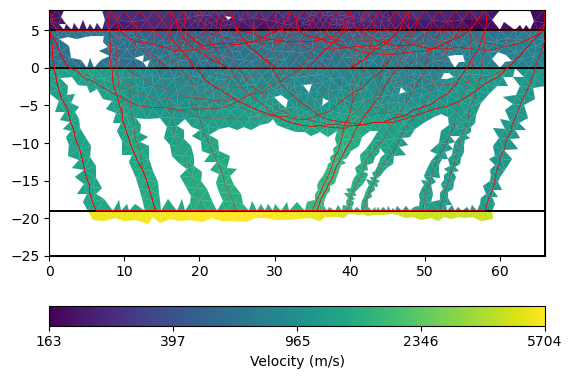

In [14]:
ax, cbar = mgr.showResult(coverage=mgr.standardizedCoverage())
rays = mgr.drawRayPaths(ax=ax, color="r", lw=0.3, alpha=0.5)

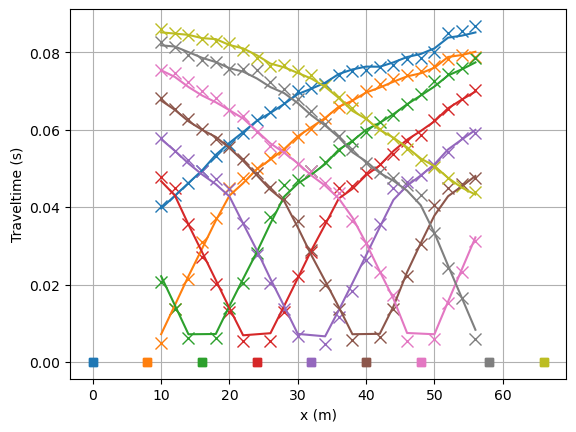

In [15]:
mgr.showFit()

In [16]:
mgr.invert(startModel=1/vel, verbose=True)

05/03/24 - 14:35:44 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.traveltime.modelling.TravelTimeDijkstraModelling object at 0x00000218B2A1A130>
Data transformation: <pgcore._pygimli_.RTrans object at 0x00000218B293E360>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000218E9040B20>
min/max (data): 0.0046/0.09
min/max (error): 1.15%/21.74%
min/max (start model): 5.0e-04/0.005
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   32.14
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    5.10 (dPhi = 83.55%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    3.83 (dPhi = 24.69%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    3.61 (dPhi = 5.59%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    3.

3713 [520.181951500075,...,2000.0]

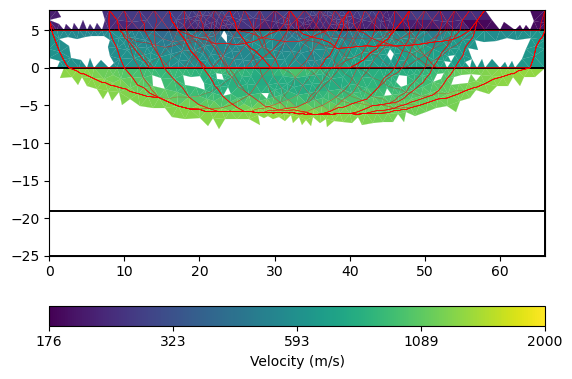

In [17]:
ax, cbar = mgr.showResult(coverage=mgr.standardizedCoverage())
rays = mgr.drawRayPaths(ax=ax, color="r", lw=0.3, alpha=0.5)